In [64]:
import random
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

cancer_data = load_breast_cancer()
x = cancer_data.data
y = cancer_data.target

feature = cancer_data.feature_names
target = cancer_data.target_names

# print features/target
print("Features: ", feature)
print("Target names: ", target)




Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names:  ['malignant' 'benign']


Accuracy:  0.9508771929824561
Confusion matrix: 
                   Predicted: Malignant  Predicted: Benign
Actual: Malignant                    91                  7
Actual: Benign                        7                180


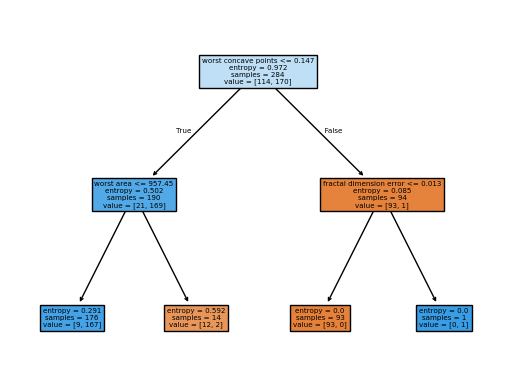

In [65]:
# split train and test, split half
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state = 42)

decision_tree = DecisionTreeClassifier(
    criterion="entropy", random_state=42,
    max_depth=2)

decision_tree.fit(x_train,y_train)

# generate y_pred
y_pred = decision_tree.predict(x_test)

# check accuracy
classifier_accuracy = accuracy_score(y_test, y_pred)

# generate confusion matrix
ball_of_confusion = confusion_matrix(y_test, y_pred)
# convert to dataframe
dataframe_confusion_matrix = pd.DataFrame(ball_of_confusion, 
                                          columns=['Predicted: Malignant', 'Predicted: Benign'], 
                                          index=['Actual: Malignant', 'Actual: Benign'])

print("Accuracy: ", classifier_accuracy)
print("Confusion matrix: ")
print(dataframe_confusion_matrix)

plot_tree(decision_tree, feature_names=feature, filled=True)
plt.show()

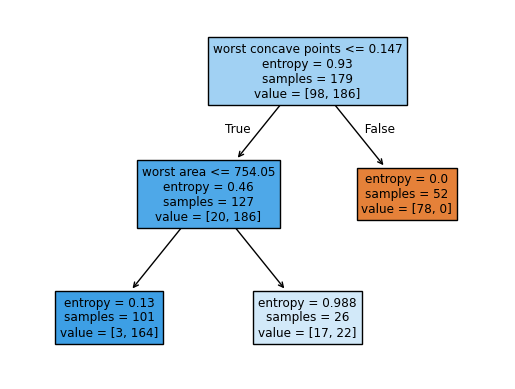

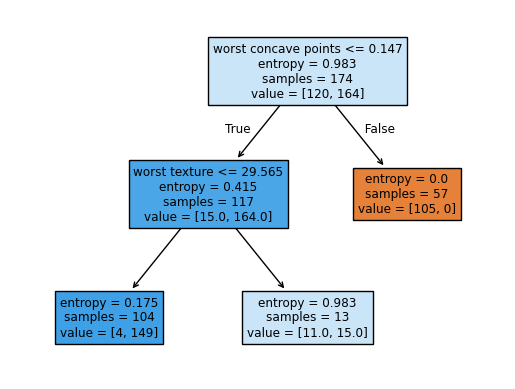

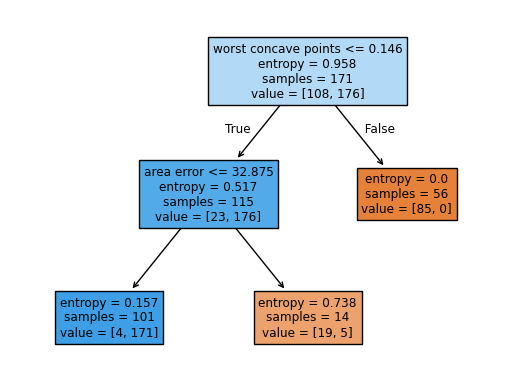

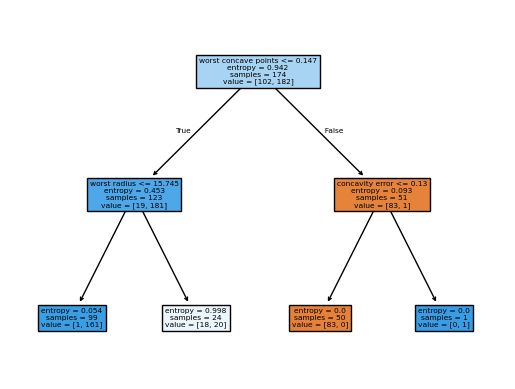

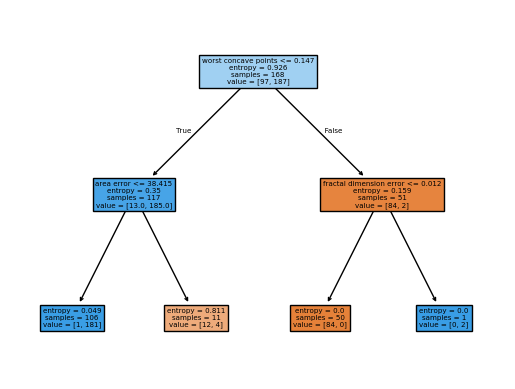

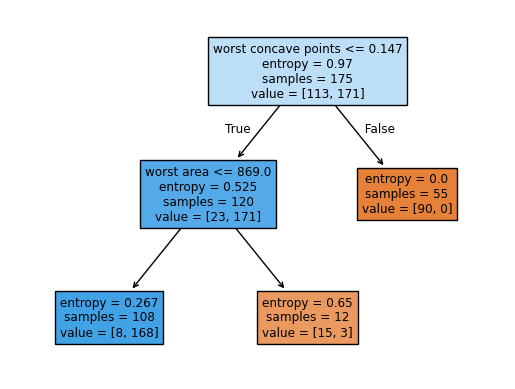

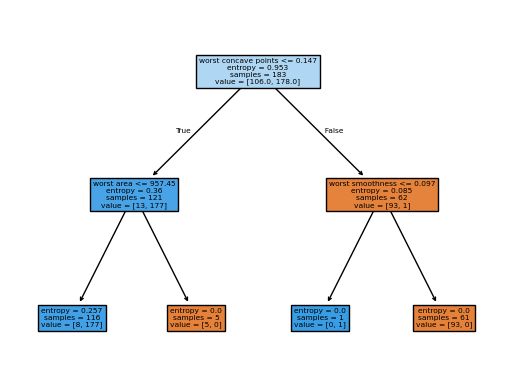

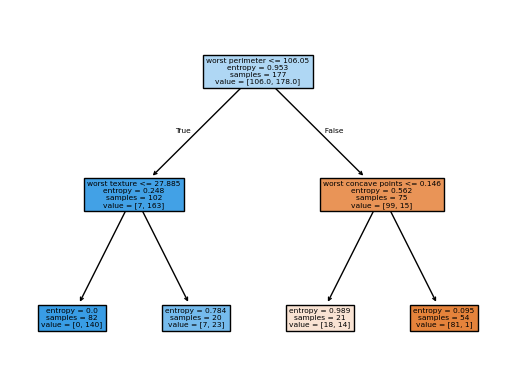

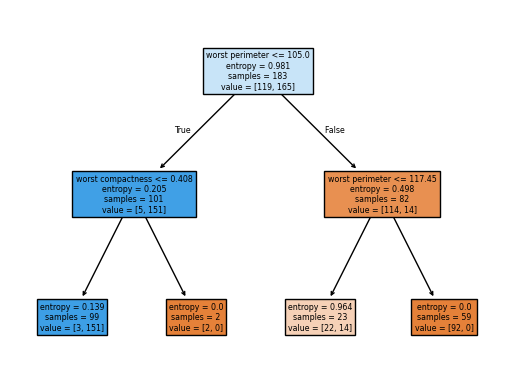

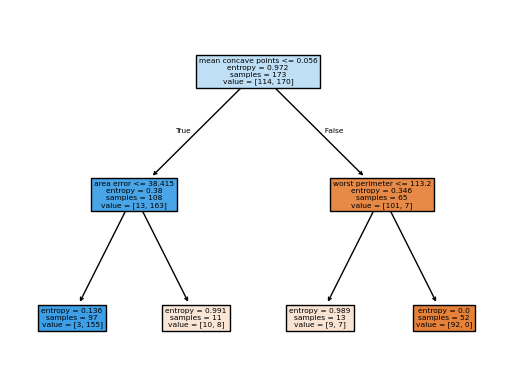

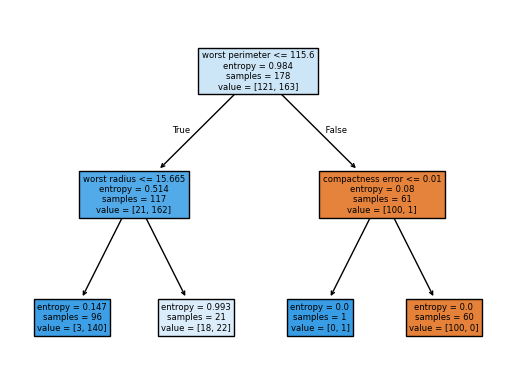

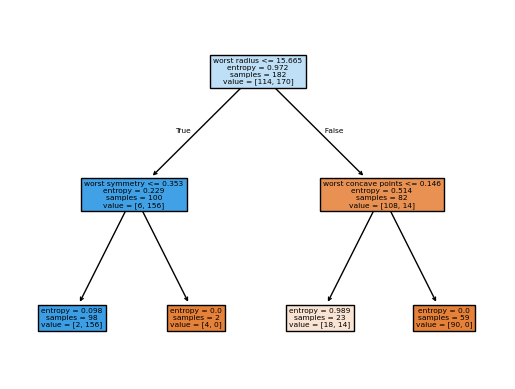

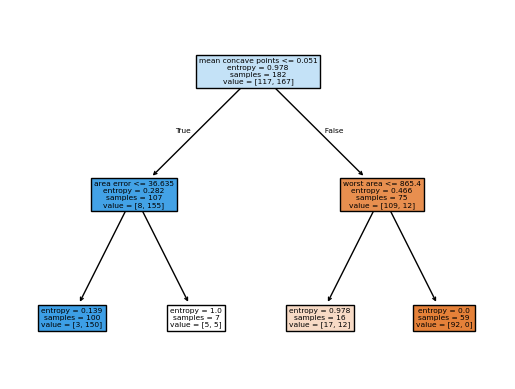

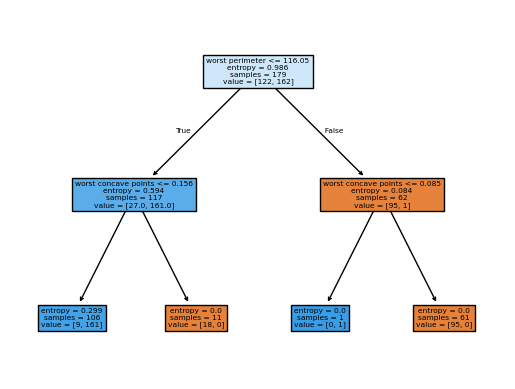

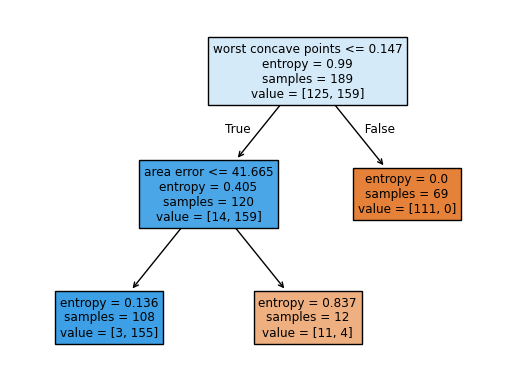

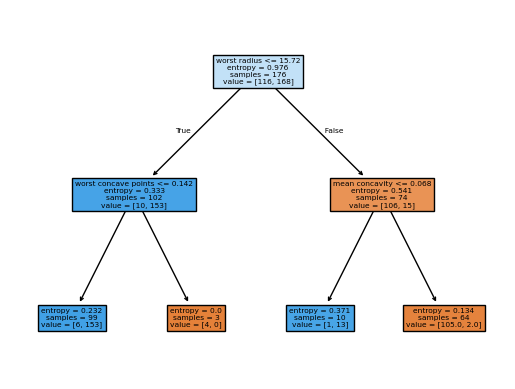

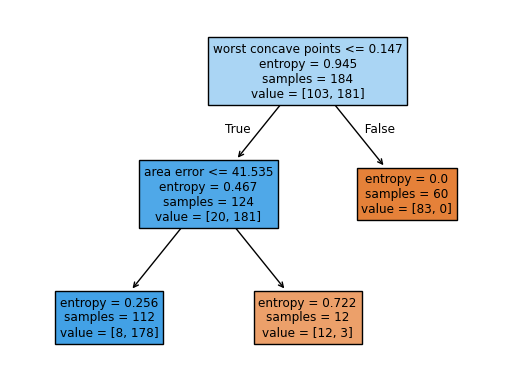

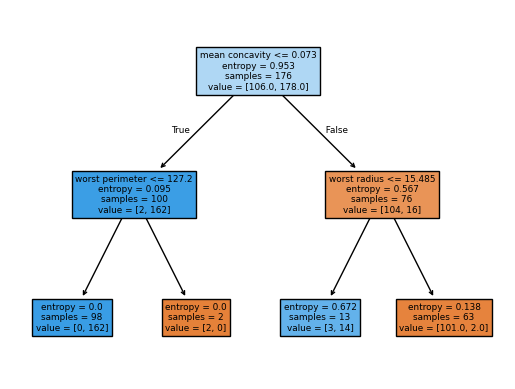

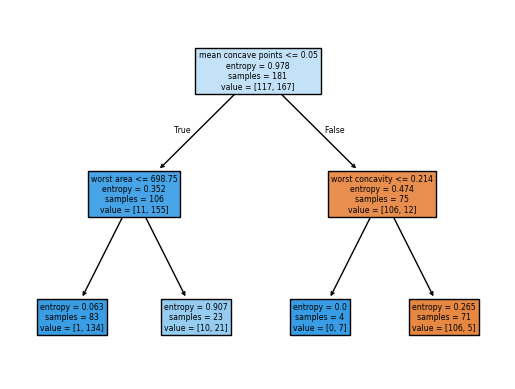

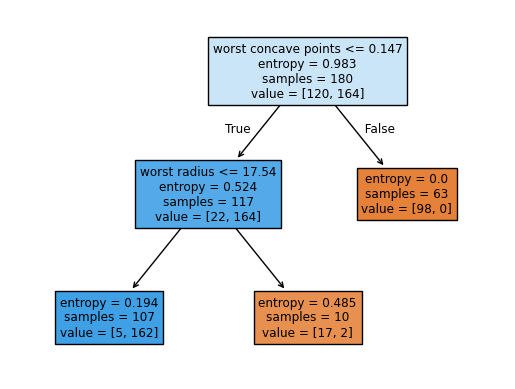

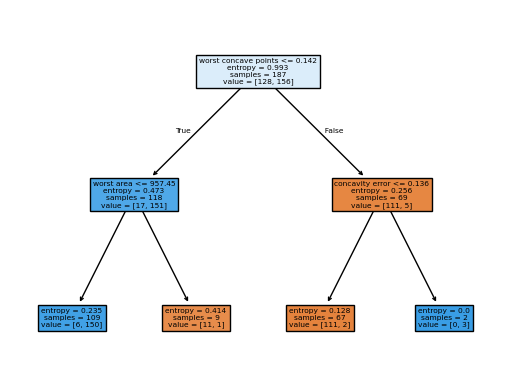

In [66]:
# create bagging decision trees and plotting through estimators/bagging
x_n_estimator_array = []
y_bagging_score = []

for i in range(1,22):
    x_n_estimator_array.append(i)
    bagging_classifier = BaggingClassifier(estimator=decision_tree, n_estimators=i, random_state=42)
    bagging_classifier.fit(x_train, y_train)
    bagging_tree = bagging_classifier.estimators_[i-1]
    y_pred = bagging_classifier.predict(x_test)
    bagging_accuracy = accuracy_score(y_test, y_pred)
    y_bagging_score.append(bagging_accuracy)
    plot_tree(bagging_tree, feature_names=feature, filled=True)
    plt.show()
    


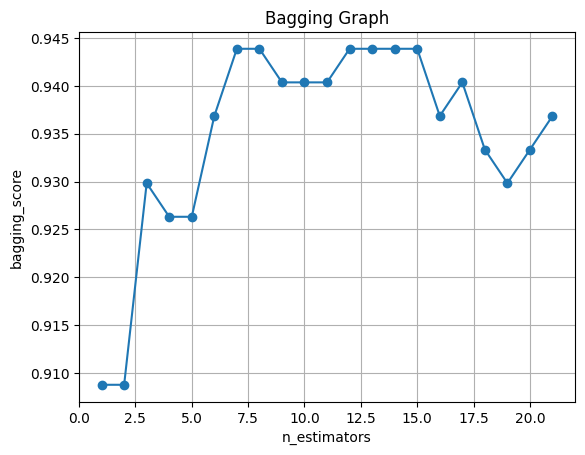

In [67]:
plt.plot(x_n_estimator_array, y_bagging_score, marker='o')
plt.grid(True)
plt.title("Bagging Graph")
plt.xlabel("n_estimators")
plt.ylabel("bagging_score")
plt.show()

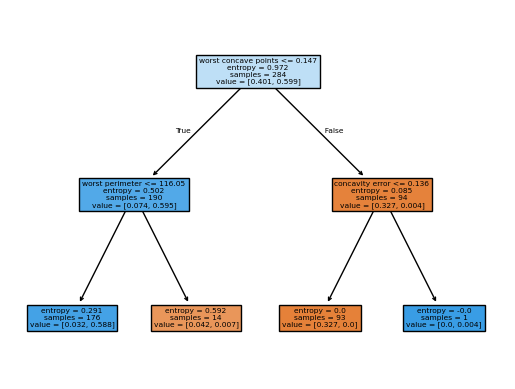

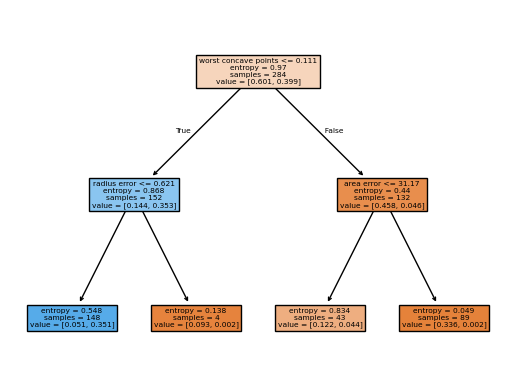

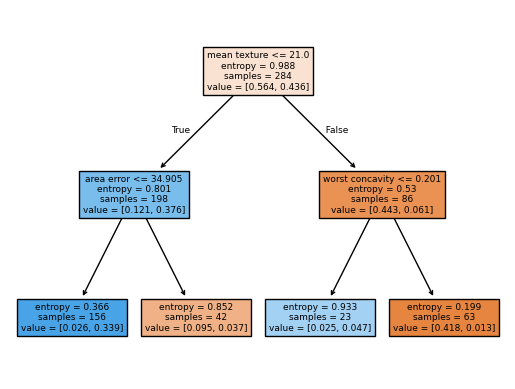

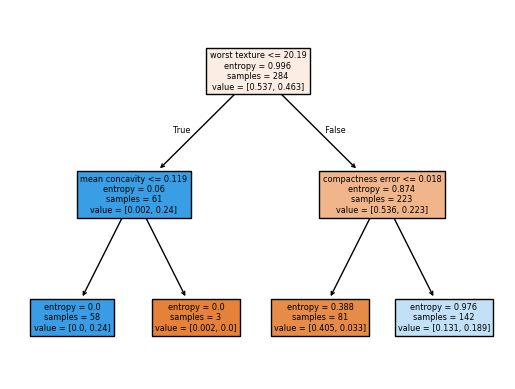

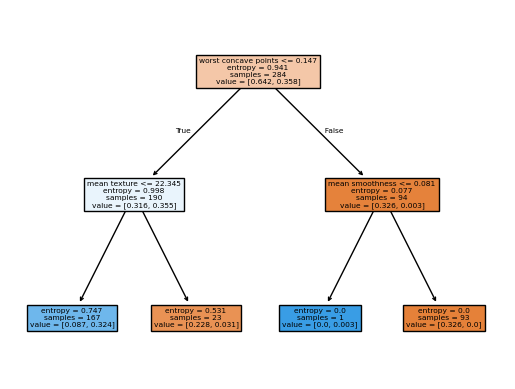

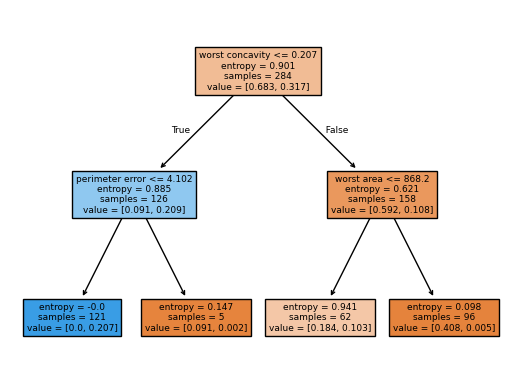

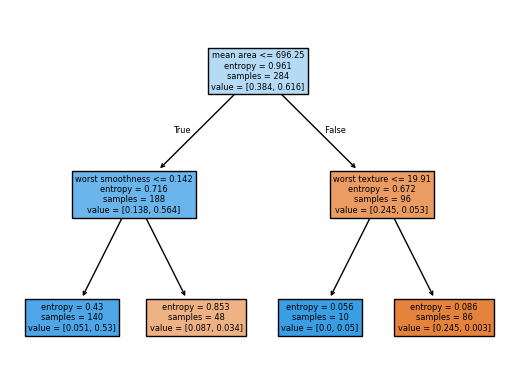

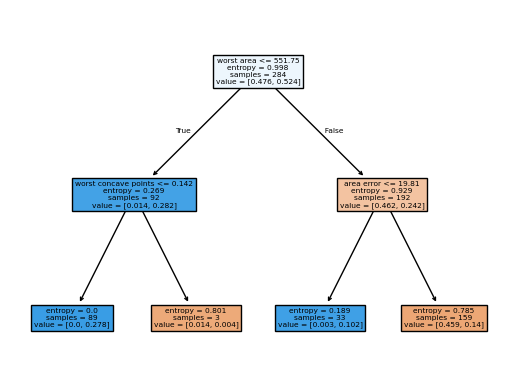

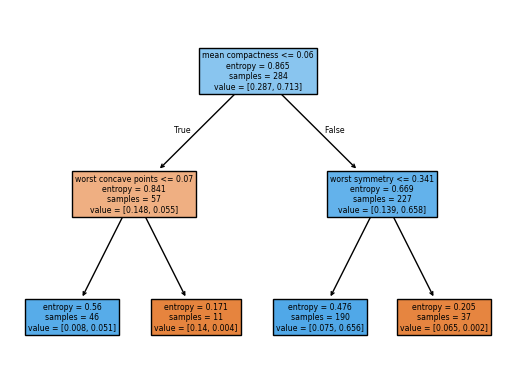

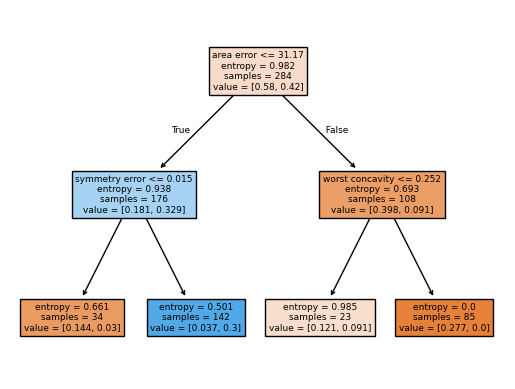

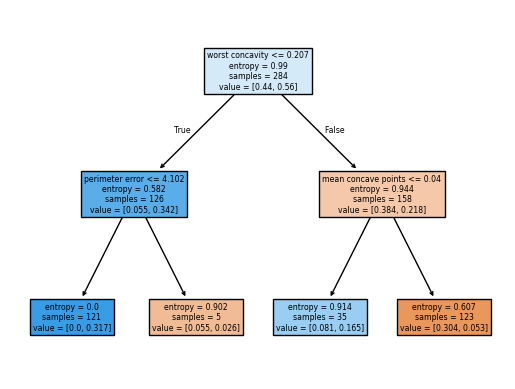

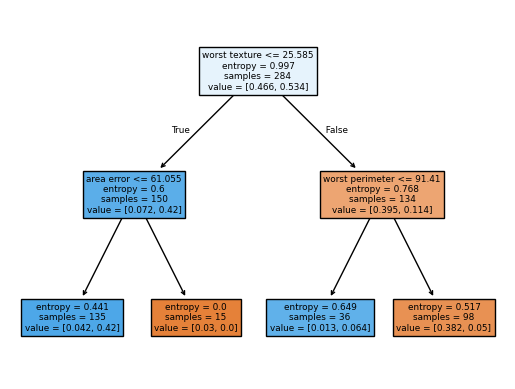

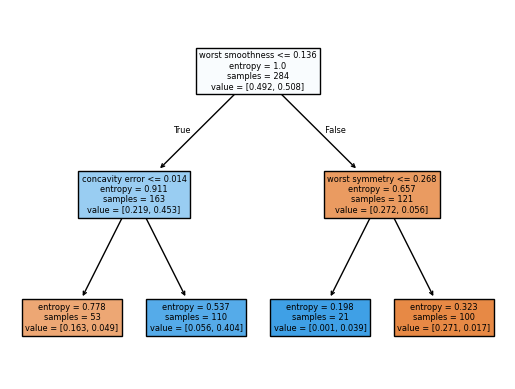

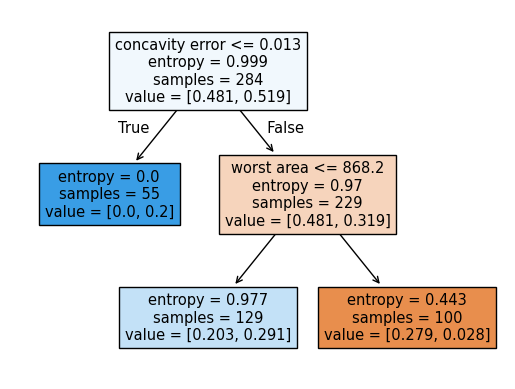

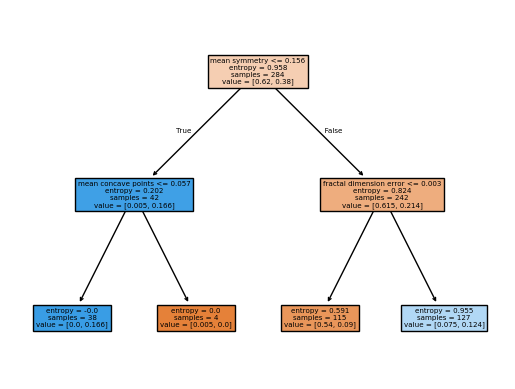

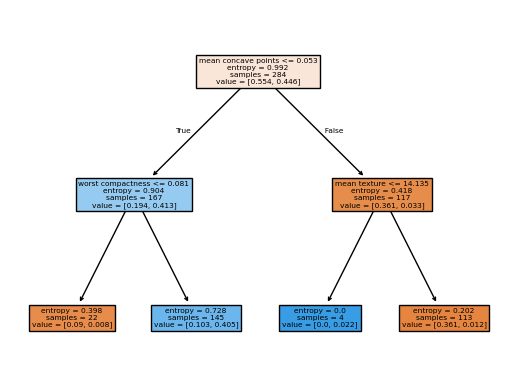

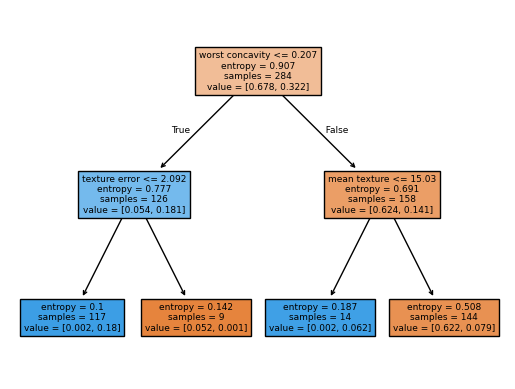

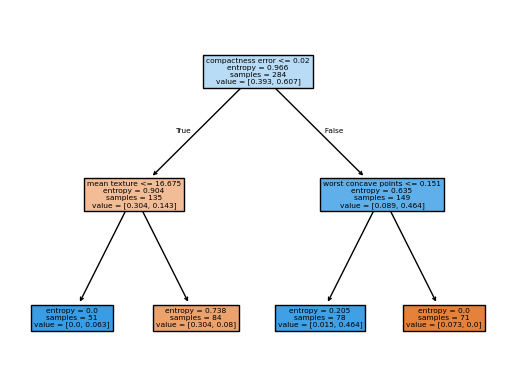

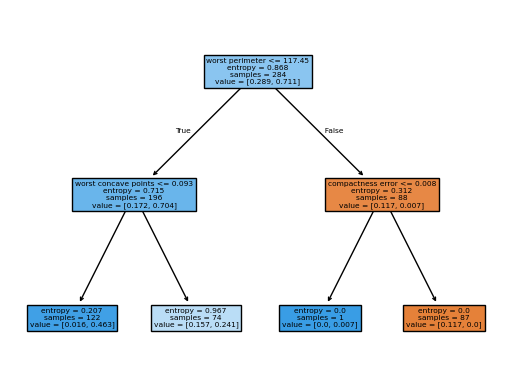

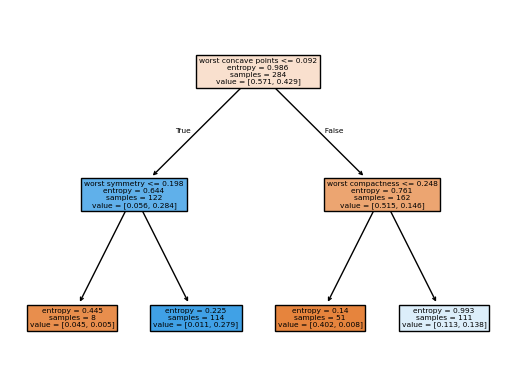

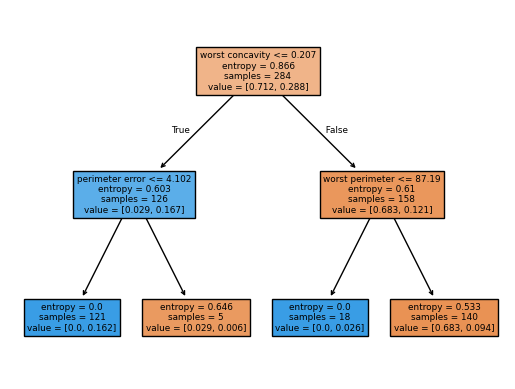

In [68]:
# Adaboost decision trees/plot creation
x_adb_estimator_array = []
y_adb_score = []
for i in range(1,22):
    x_adb_estimator_array.append(i)
    adb_classifier = AdaBoostClassifier(estimator=decision_tree, n_estimators=i, random_state=42, algorithm='SAMME')
    adb_classifier.fit(x_train,y_train)
    adb_tree = adb_classifier.estimators_[i-1]
    y_pred = adb_classifier.predict(x_test)
    adb_accuracy = accuracy_score(y_test, y_pred)
    y_adb_score.append(adb_accuracy)
    plot_tree(adb_tree, feature_names=feature, filled=True)
    plt.show()
    


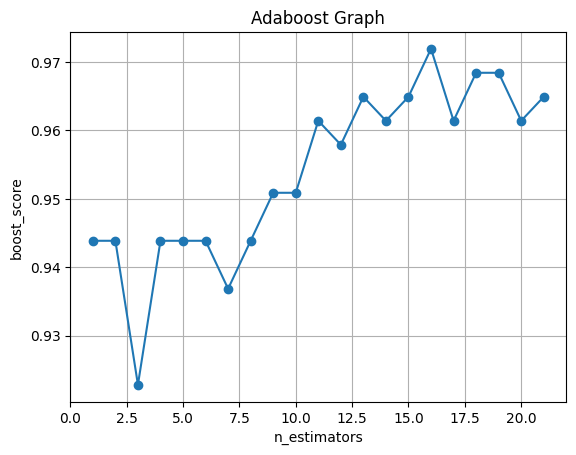

In [69]:
plt.plot(x_adb_estimator_array, y_adb_score, marker='o')
plt.grid(True)
plt.title("Adaboost Graph")
plt.xlabel("n_estimators")
plt.ylabel("boost_score")
plt.show()

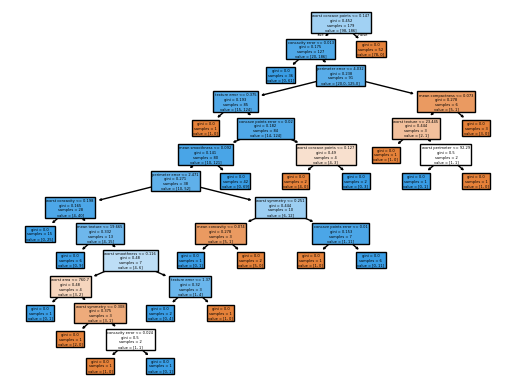

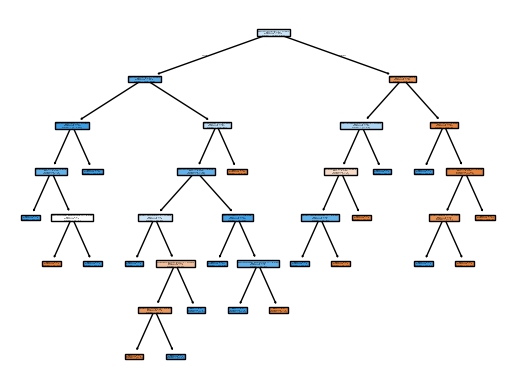

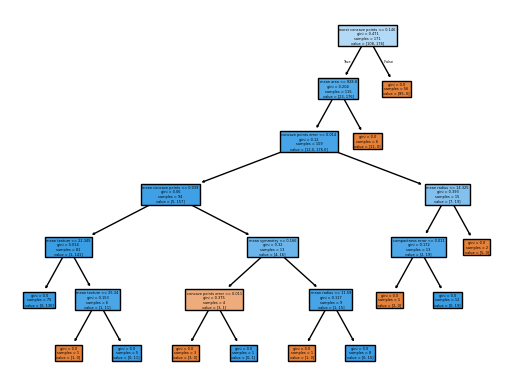

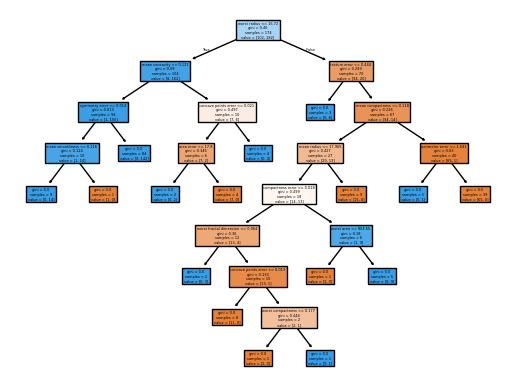

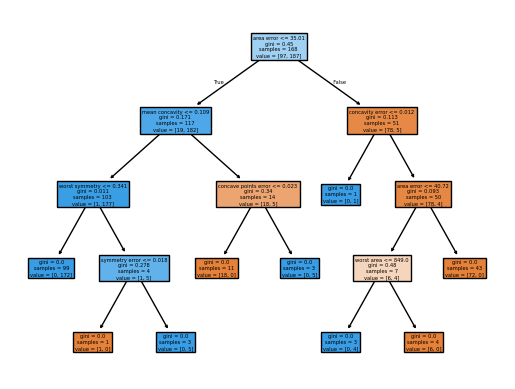

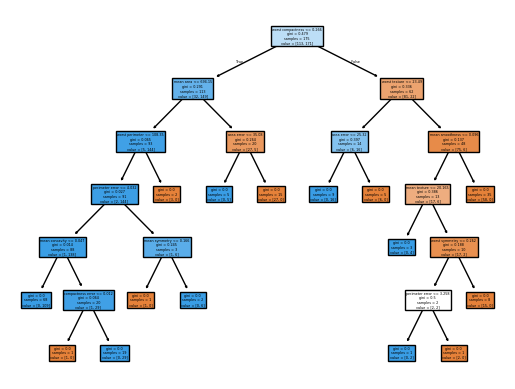

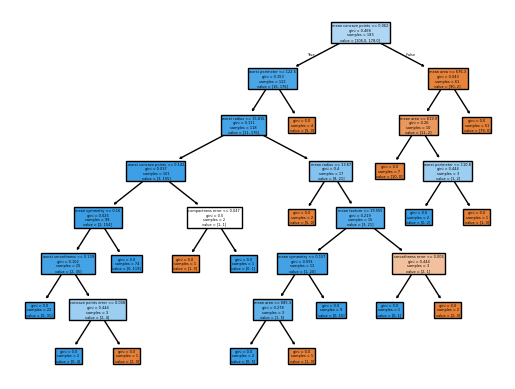

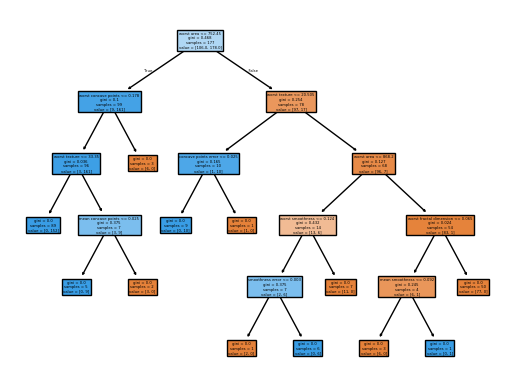

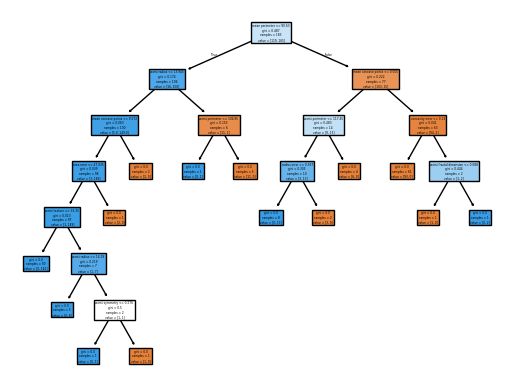

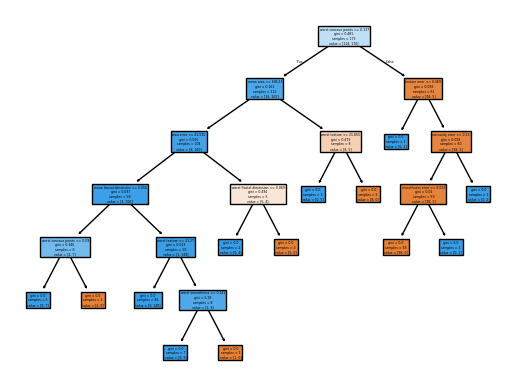

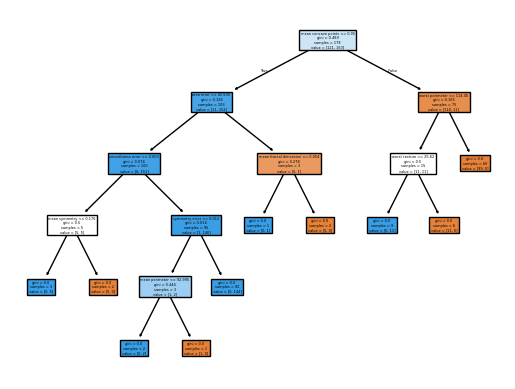

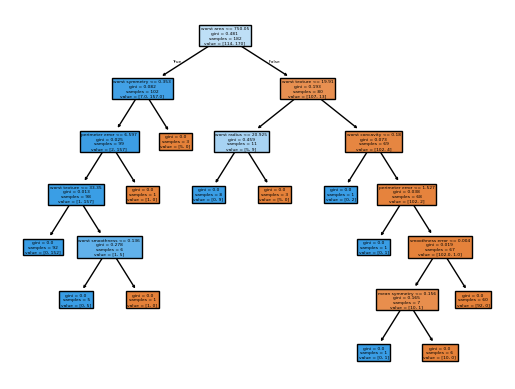

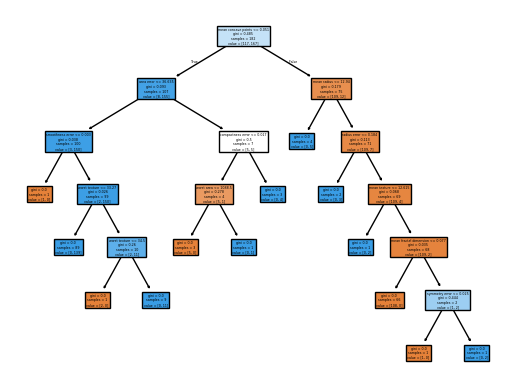

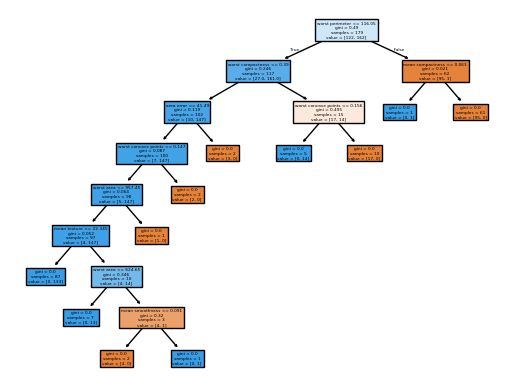

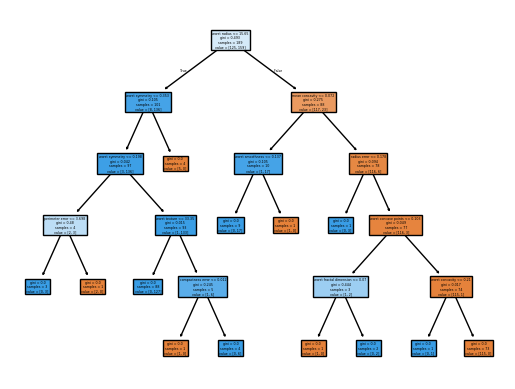

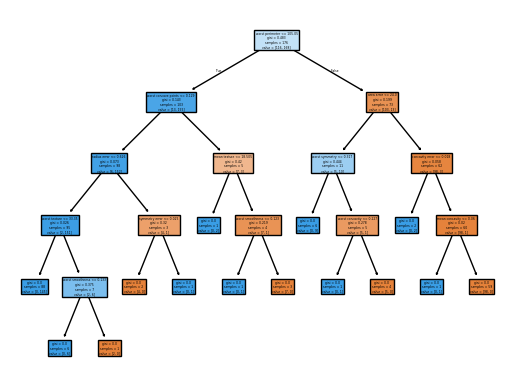

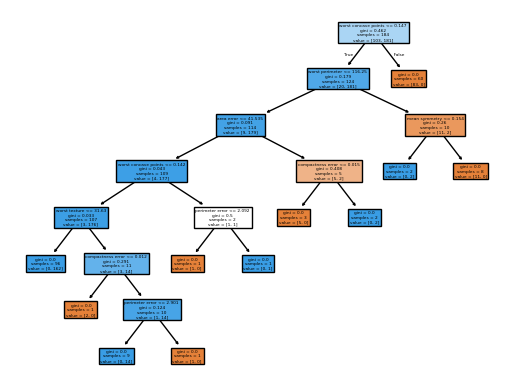

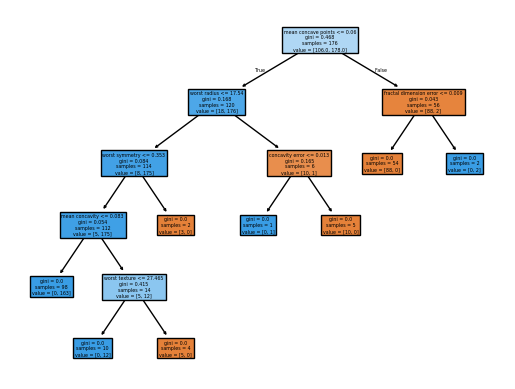

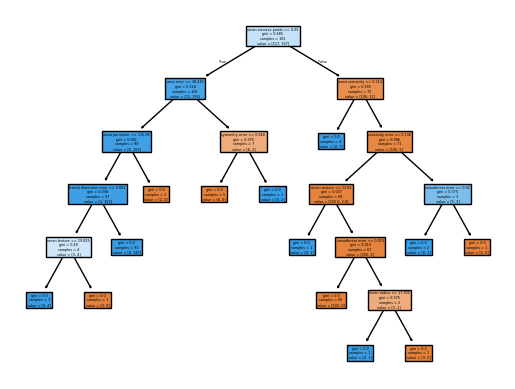

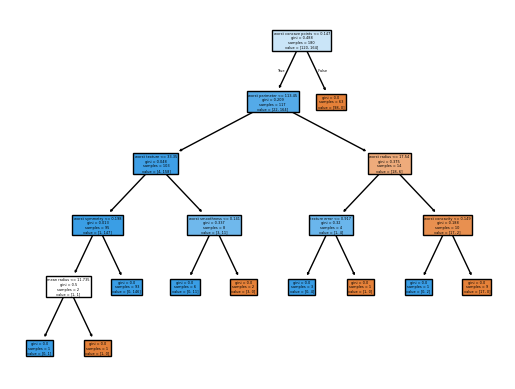

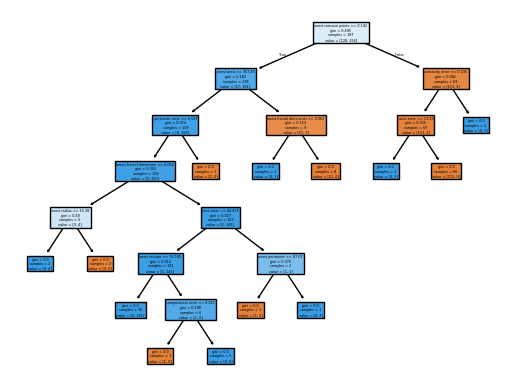

In [70]:
#part k 
from sklearn.ensemble import RandomForestClassifier

# create a max_features
# 21 features, hardcoded
x_rand_forest_max_features = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
y_rand_forest_score = []

for i in x_rand_forest_max_features:
    rand_forest_classifier = RandomForestClassifier(n_estimators=100, max_features=i, random_state=42)
    rand_forest_classifier.fit(x_train,y_train)
    rand_forest_tree = rand_forest_classifier.estimators_[i-1]
    y_pred = rand_forest_classifier.predict(x_test)
    rand_forest_accuracy = accuracy_score(y_test, y_pred)
    y_rand_forest_score.append(rand_forest_accuracy)
    plot_tree(rand_forest_tree, feature_names=feature, filled=True)
    plt.show()


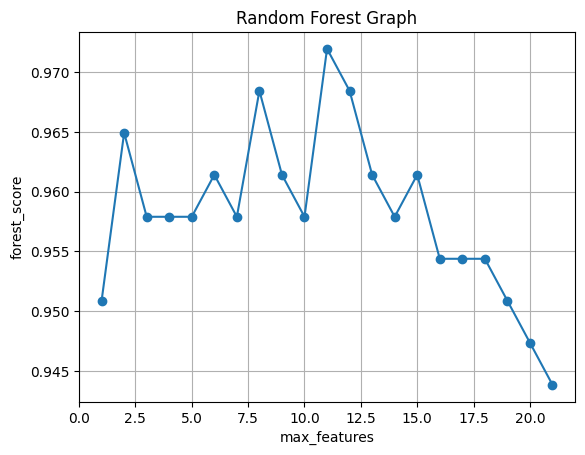

In [71]:
plt.plot(x_rand_forest_max_features, y_rand_forest_score, marker='o')
plt.grid(True)
plt.title("Random Forest Graph")
plt.xlabel("max_features")
plt.ylabel("forest_score")
plt.show()